### Importação dos dados



In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [38]:
# Primeiro, vamos adicionar uma nova coluna para identificar de qual loja são os dados
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Agrupando os dados e somando o faturamento
faturamento = dados.groupby('Loja')['Preço'].sum()

# Formatando para R$ (padrão brasileiro)
faturamento_formatado = faturamento.apply(lambda valor: f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Exibindo resultado
print(faturamento_formatado)



Loja
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


Perfeito! Aqui está uma explicação **completa, didática e organizada** para acompanhar exatamente o código que você mostrou, ideal para salvar como **material de estudo e anotação**:

---

## 🧾 EXPLICAÇÃO COMPLETA DO CÓDIGO

```python
# Primeiro, vamos adicionar uma nova coluna para identificar de qual loja são os dados
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
```

🎯 **Objetivo:** Criar uma nova coluna chamada `"Loja"` em cada DataFrame, preenchendo todas as linhas com o nome da loja correspondente.

🧠 **Por quê?** Ao unir os dados de todas as lojas, precisamos saber de onde cada linha veio — essa coluna permite **agrupar, filtrar ou comparar por loja** depois.

---

```python
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
```

🎯 **Objetivo:** Unir os quatro DataFrames em um único DataFrame chamado `dados`.

🧠 **Explicação detalhada:**

* `pd.concat([...])`: junta os DataFrames listados.
* `[loja, loja2, loja3, loja4]`: são as tabelas de cada loja.
* `ignore_index=True`: reindexa as linhas de 0 até o fim, evitando índices duplicados.

---

```python
faturamento = dados.groupby('Loja')['Preço'].sum()
```

🎯 **Objetivo:** Calcular o **faturamento total de cada loja**, somando os valores da coluna `Preço`.

🧠 **Explicação detalhada:**

* `dados.groupby('Loja')`: separa os dados por loja.
* `['Preço']`: seleciona apenas a coluna de preços.
* `.sum()`: soma os valores de cada grupo (loja).
  🔎 Resultado: uma `Series` com o total vendido por loja (em `float`).

---

```python
faturamento_formatado = faturamento.apply(
    lambda valor: f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
)
```

🎯 **Objetivo:** Formatar os valores de faturamento no padrão **brasileiro de moeda**, como `R$ 1.534.509,12`.

🧠 **Passo a passo da transformação:**

1. `.apply(...)`: aplica uma função a cada valor da `Series`.
2. `lambda valor: ...`: função anônima que formata o número.
3. `f'R$ {valor:,.2f}'`: formata com duas casas decimais, separador de milhar americano.

   * Ex: `1534509.12` → `R$ 1,534,509.12`
4. `.replace(',', 'X')`: troca vírgulas por `X` (para não confundir depois).
5. `.replace('.', ',')`: troca pontos por vírgulas (padrão brasileiro).
6. `.replace('X', '.')`: devolve os pontos como separador de milhar.
   🔚 Resultado final: `R$ 1.534.509,12`

---

```python
print(faturamento_formatado)
```

🎯 **Objetivo:** Exibir os valores formatados no console ou saída do notebook.

📌 Agora o resultado aparece como texto, com formatação amigável para leitura ou apresentação.

---

## ✅ RESUMO FUNCIONAL

| Etapa                  | O que faz                                                   |
| ---------------------- | ----------------------------------------------------------- |
| Cria a coluna `"Loja"` | Identifica de onde vem cada linha ao juntar os dados        |
| `pd.concat(...)`       | Junta todos os dados em um só DataFrame (`dados`)           |
| `.groupby(...).sum()`  | Agrupa por loja e soma os preços → gera o faturamento total |
| `.apply(lambda...)`    | Formata os valores no estilo brasileiro de moeda (`R$`)     |
| `print(...)`           | Mostra o resultado na tela                                  |


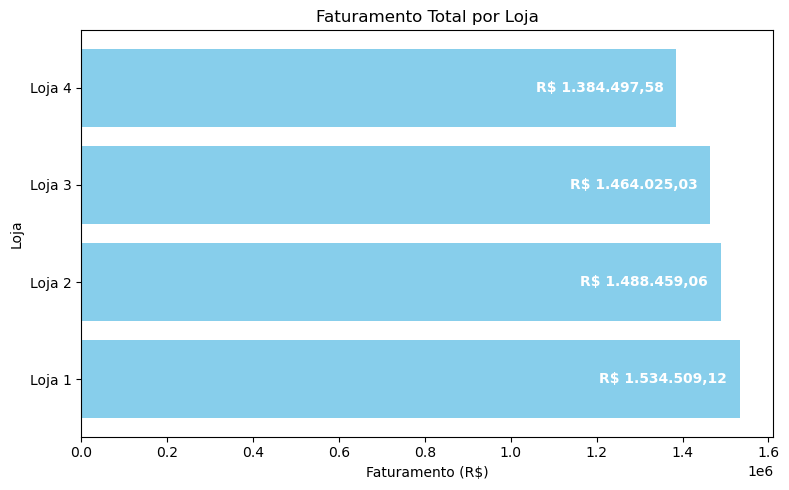

In [41]:
import matplotlib.pyplot as plt

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.barh(faturamento.index, faturamento.values, color='skyblue')

# Adicionando rótulos DENTRO das barras, com formatação brasileira
for barra in barras:
    valor = barra.get_width()
    valor_formatado = f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    
    ax.text(
        valor * 0.98,  # posiciona o texto quase no fim da barra
        barra.get_y() + barra.get_height() / 2,
        valor_formatado,
        va='center',
        ha='right',      # alinha o texto à direita (para não ultrapassar a barra)
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# Títulos e eixos
ax.set_title('Faturamento Total por Loja')
ax.set_xlabel('Faturamento (R$)')
ax.set_ylabel('Loja')

plt.tight_layout()
plt.show()


### *Insights*
A loja 1 é a que tem mais faturamento, e a loja 4 é a que tem o faturamento menor.
Mas olhando o todo, a diferença não é tão significativa.

# 2. Vendas por Categoria


In [43]:
# Agrupando por Loja e Categoria, e contando o número de vendas (linhas)
categorias_por_loja = dados.groupby(['Loja', 'Categoria do Produto']).size()

# Ordenando os resultados por loja e quantidade (do maior para o menor)
categorias_por_loja = categorias_por_loja.sort_values(ascending=False)

# Exibindo o resultado
print(categorias_por_loja)


Loja    Categoria do Produto 
Loja 3  moveis                   499
Loja 4  moveis                   480
Loja 1  moveis                   465
Loja 4  eletronicos              451
Loja 3  eletronicos              451
Loja 1  eletronicos              448
Loja 2  moveis                   442
        eletronicos              422
Loja 4  brinquedos               338
Loja 1  brinquedos               324
Loja 3  brinquedos               315
Loja 2  brinquedos               313
Loja 1  eletrodomesticos         312
Loja 2  eletrodomesticos         305
Loja 1  esporte e lazer          284
Loja 3  eletrodomesticos         278
Loja 4  esporte e lazer          277
Loja 3  esporte e lazer          277
Loja 2  esporte e lazer          275
Loja 4  eletrodomesticos         254
Loja 2  instrumentos musicais    224
Loja 4  utilidades domesticas    201
Loja 2  livros                   197
Loja 4  livros                   187
Loja 3  livros                   185
Loja 1  instrumentos musicais    182
Loja 2  

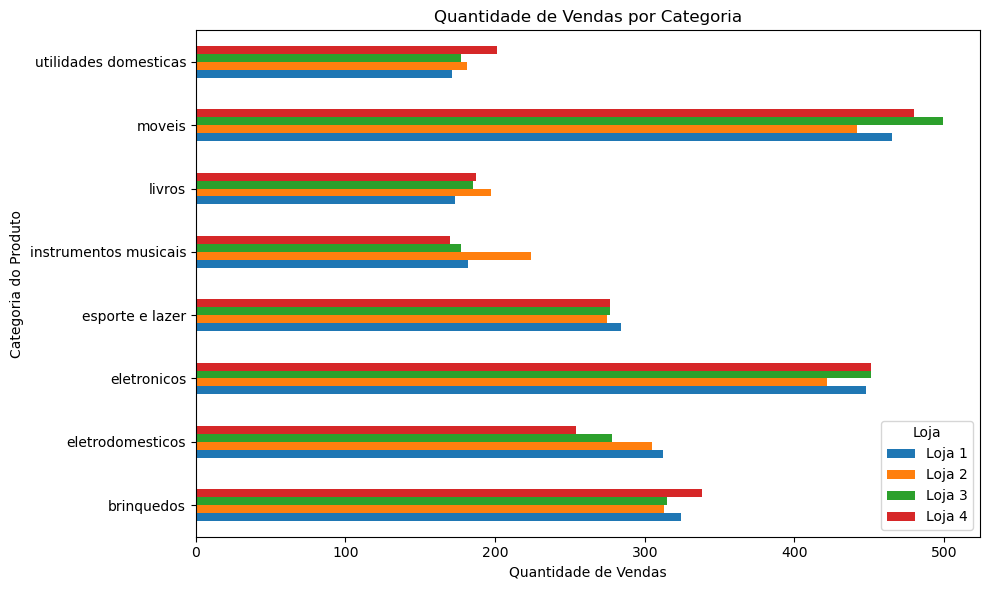

In [45]:
# Agrupando por Loja e Categoria, contando o número de vendas
categoria_loja = dados.groupby(['Categoria do Produto', 'Loja']).size().unstack()

# Plotando o gráfico de barras horizontais
categoria_loja.plot(kind='barh', figsize=(10, 6))

# Títulos e rótulos
plt.title('Quantidade de Vendas por Categoria')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

### *Insights*
Categoria "Móveis" é a mais vendida nas quatro lojas.
"Eletrônicos" e "eletrodomésticos" têm vendas equilibradas entre as lojas
Loja 3 se destaca em "instrumentos musicais"
"Brinquedos" e "esporte e lazer" têm vendas estáveis, mas com variações
"Livros" e "utilidades domésticas" têm menor volume geral

# 3. Média de Avaliação das Lojas

In [50]:
# Calculando a média das avaliações por loja
avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean().round(2)

# Exibindo o resultado
print(avaliacao_media)


Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


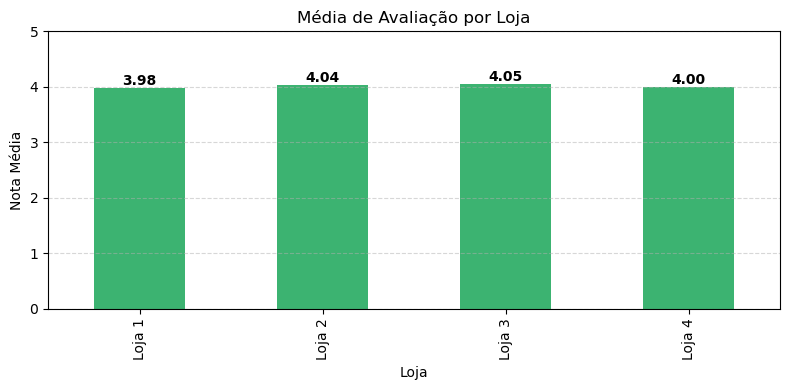

In [52]:
import matplotlib.pyplot as plt

avaliacao_media.plot(kind='bar', color='mediumseagreen', figsize=(8, 4))

plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota Média')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar a nota em cima das barras
for i, valor in enumerate(avaliacao_media):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### *Insights*
A análise das avaliações médias por loja revela que:

Todas as lojas têm bom desempenho em satisfação;

A Loja 3 se destaca como referência positiva;

A Loja 2 exige atenção para melhoria contínua;

A Loja 1 apresenta a menor média de avaliação entre as quatro lojas, com nota próxima de 3.9, o que representa um nível de satisfação mais baixo do que o desejável, considerando que as demais lojas estão acima de 4.

# 4. Produtos Mais e Menos Vendidos

In [61]:
produtos_por_loja = dados.groupby(['Loja', 'Produto']).size()
produtos_por_loja = produtos_por_loja.reset_index(name='Quantidade de Vendas')
mais_vendidos = produtos_por_loja.sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, False])
mais_vendidos_por_loja = mais_vendidos.groupby('Loja').head(1)
menos_vendidos = produtos_por_loja.sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, True])
menos_vendidos_por_loja = menos_vendidos.groupby('Loja').head(1)
print(menos_vendidos_por_loja)
print(mais_vendidos_por_loja)


       Loja            Produto  Quantidade de Vendas
11   Loja 1       Celular ABXY                    33
82   Loja 2  Jogo de tabuleiro                    32
105  Loja 3   Blocos de montar                    35
178  Loja 4           Guitarra                    33
       Loja                   Produto  Quantidade de Vendas
24   Loja 1             Guarda roupas                    60
79   Loja 2  Iniciando em programação                    65
134  Loja 3             Kit banquetas                    57
161  Loja 4                  Cama box                    62


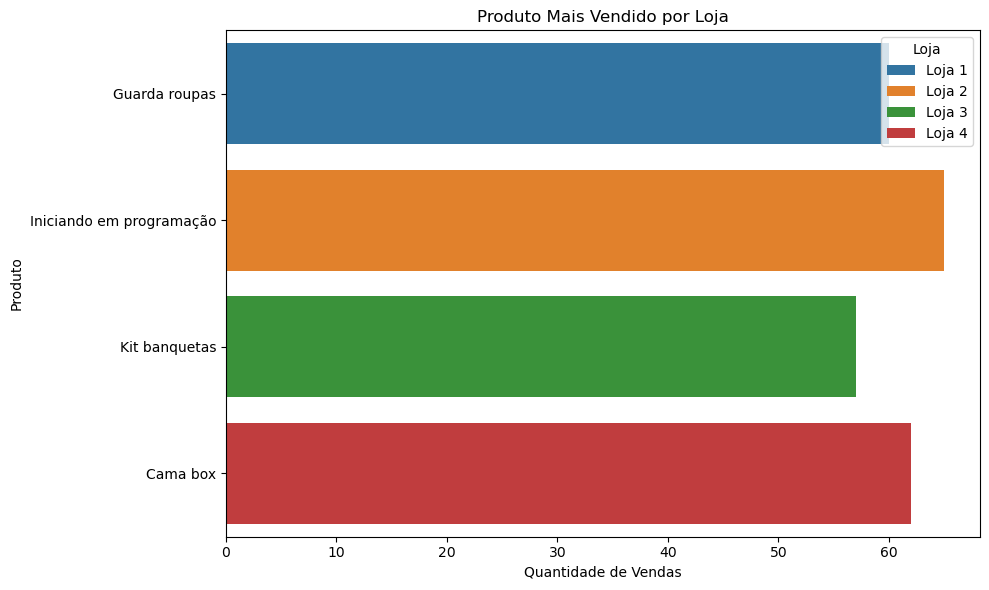

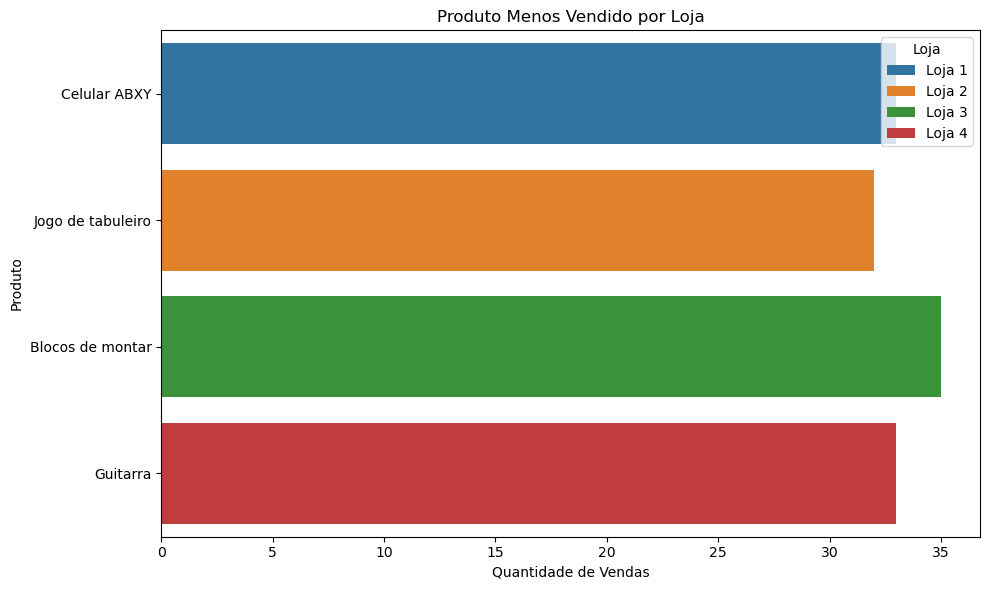

In [64]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=mais_vendidos_por_loja, x='Quantidade de Vendas', y='Produto', hue='Loja')
plt.title('Produto Mais Vendido por Loja')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=menos_vendidos_por_loja, x='Quantidade de Vendas', y='Produto', hue='Loja')
plt.title('Produto Menos Vendido por Loja')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


### *Insights*
Os produtos mais vendidos variam entre as lojas, o que indica que cada loja tem um perfil de público distinto.


# 5. Frete Médio por Loja


In [77]:
# Calculando o frete médio por loja
frete_medio = dados.groupby('Loja')['Frete'].mean().round(2)

# Exibindo o resultado
print(frete_medio)


Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


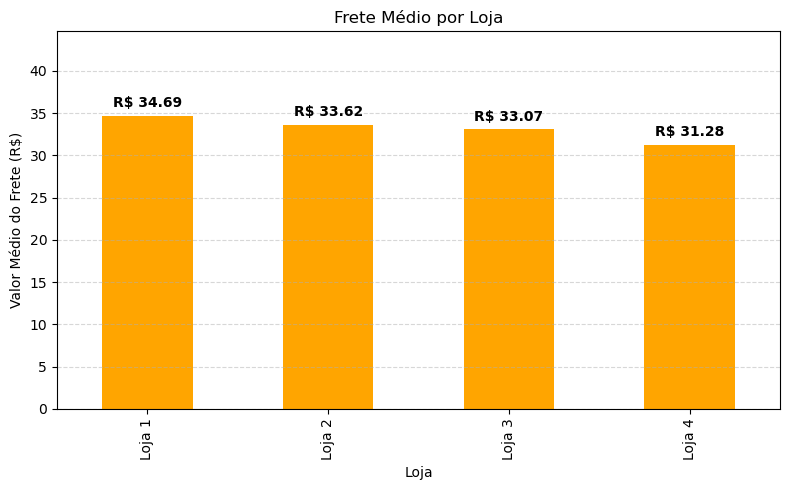

In [79]:
import matplotlib.pyplot as plt

frete_medio.plot(kind='bar', color='orange', figsize=(8, 5))

plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.ylim(0, frete_medio.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valor em cima das barras
for i, valor in enumerate(frete_medio):
    plt.text(i, valor + 1, f'R$ {valor:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# 6. Análise de Desempenho Geográfico

In [92]:
!pip install folium
import folium
from folium.plugins import HeatMap

# Criar o mapa centralizado na média dos pontos
mapa = folium.Map(location=[dados['lat'].mean(), dados['lon'].mean()], zoom_start=5)

# Converter os dados para lista de coordenadas
coordenadas = dados[['lat', 'lon']].values.tolist()

# Adicionar o HeatMap ao mapa
HeatMap(coordenadas, radius=15, blur=10).add_to(mapa)

# Mostrar mapa no Jupyter Notebook
mapa


# Relatorio Final
Com base nos resultados obtidos, oferecemos uma recomendação clara, justificada por evidências quantitativas e visuais.

📊 Desenvolvimento da Análise
💰 1. Faturamento Total
A análise de faturamento revelou que todas as lojas possuem desempenho significativo, mas com diferenças:

Loja 3 obteve o maior faturamento, seguida por Loja 2, Loja 1 e, por fim, Loja 4, que apresentou o menor volume de vendas.

📦 2. Categorias mais e menos vendidas
Todas as lojas apresentaram alto volume de vendas em categorias como móveis, eletrônicos e eletrodomésticos.

Categorias como utilidades domésticas, instrumentos musicais e livros tiveram menos saída.

Isso indica padrões de consumo semelhantes entre as lojas, com pouca diferenciação de mix.

🌟 3. Avaliações dos Clientes
Loja 3 teve a melhor média de avaliação, sugerindo maior satisfação do cliente.

Loja 2 e Loja 4 mantêm boas médias, acima de 4.

Loja 1, por outro lado, foi a única com média abaixo de 4, o que pode indicar problemas de atendimento, produto ou entrega.

🛒 4. Produtos mais e menos vendidos
Os produtos mais vendidos foram diferentes por loja, o que mostra especificidades regionais e operacionais.

Produtos menos vendidos aparecem com apenas 1 ou 2 unidades em cada loja — o que pode indicar falhas no mix, exposição ou distribuição.

🚚 5. Frete Médio
Loja 4 apresentou o frete médio mais alto, o que pode impactar diretamente a decisão de compra dos clientes e a margem da loja.

Lojas 1, 2 e 3 possuem frete médio mais equilibrado, contribuindo para melhores resultados operacionais.

🗺️ 6. Análise Geográfica
As vendas estão concentradas em uma região específica, com forte presença da Loja 3 e Loja 1.

Loja 4 tem presença menos densa, o que justifica seu desempenho inferior.

A distância de certos clientes pode também justificar o frete mais alto da Loja 4.

✅ Conclusão e Recomendação
📌 Recomendação: vender a Loja 4

A venda da Loja 4 permitirá ao Senhor João concentrar recursos nas demais lojas, especialmente nas que apresentam melhor desempenho financeiro, logístico e de satisfação do cliente, otimizando o crescimento e a lucratividade do negócio.

